# Navigation

---

Congratulations for completing the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893)!  In this notebook, you will learn how to control an agent in a more challenging environment, where it can learn directly from raw pixels!  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [7]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
from pixel_ddqn_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/VisualBanana.app"`
- **Windows** (x86): `"path/to/VisualBanana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/VisualBanana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/VisualBanana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/VisualBanana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `VisualBanana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="VisualBanana.app")
```

In [8]:
env = UnityEnvironment(file_name="../VisualBanana_Windows_x86_64/Banana.exe")

OSError: handle is closed

ERROR:root:Exception calling application: [WinError 232] 파이프가 닫히는 중입니다
Traceback (most recent call last):
  File "c:\users\jh\.conda\envs\pytorch\lib\site-packages\grpc\_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "c:\users\jh\.conda\envs\pytorch\lib\site-packages\unityagents\rpc_communicator.py", line 25, in Exchange
    self.child_conn.send(request)
  File "c:\users\jh\.conda\envs\pytorch\lib\multiprocessing\connection.py", line 206, in send
    self._send_bytes(_ForkingPickler.dumps(obj))
  File "c:\users\jh\.conda\envs\pytorch\lib\multiprocessing\connection.py", line 280, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
BrokenPipeError: [WinError 232] 파이프가 닫히는 중입니다


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The environment state is an array of raw pixels with shape `(1, 84, 84, 3)`.  *Note that this code differs from the notebook for the project, where we are grabbing **`visual_observations`** (the raw pixels) instead of **`vector_observations`**.* A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

Number of agents: 1
Number of actions: 4
States look like:


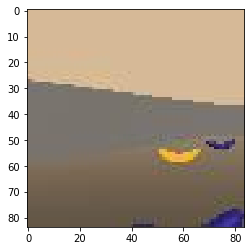

States have shape: (1, 84, 84, 3)


In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.visual_observations[0]
print('States look like:')
plt.imshow(np.squeeze(state))
plt.show()
state_size = state.shape
print('States have shape:', state.shape)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

Starting Agent Testing:
Episode 100	Score: -1.0	Max Score: 3.0	Min Score: -4.0	Average Score: -0.06	
Episode 200	Score: -1.0	Max Score: 4.0	Min Score: -4.0	Average Score: 0.28		
Episode 300	Score: 2.0	Max Score: 4.0	Min Score: -3.0	Average Score: 0.67		
Episode 400	Score: 1.0	Max Score: 7.0	Min Score: -2.0	Average Score: 1.86		
Episode 500	Score: 2.0	Max Score: 12.0	Min Score: -1.0	Average Score: 2.97		
Episode 600	Score: 6.0	Max Score: 14.0	Min Score: -1.0	Average Score: 4.97		
Episode 700	Score: 4.0	Max Score: 16.0	Min Score: -1.0	Average Score: 6.36		
Episode 800	Score: 8.0	Max Score: 16.0	Min Score: 0.0	Average Score: 7.21		
Episode 900	Score: 4.0	Max Score: 20.0	Min Score: 0.0	Average Score: 8.68		
Episode 1000	Score: 9.0	Max Score: 18.0	Min Score: -2.0	Average Score: 9.01	
Episode 1100	Score: 17.0	Max Score: 22.0	Min Score: 1.0	Average Score: 9.99		
Episode 1200	Score: 10.0	Max Score: 19.0	Min Score: 0.0	Average Score: 9.43		
Episode 1300	Score: 13.0	Max Score: 18.0	Min Score: 0.

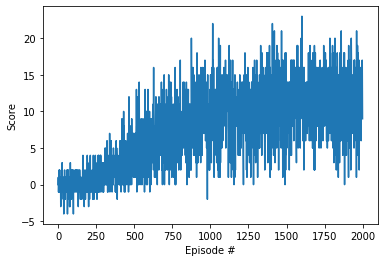

In [5]:
#Testing the agent
from unityagents import UnityEnvironment
import numpy as np
import time
from collections import deque
import matplotlib.pyplot as plt
import torch
import pickle
from pixel_ddqn_agent import Agent

#local_network_fn = 'ddqn_checkpoint_local.pth'
def train(num_episodes=10, max_t = 1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = []
    scores_window = deque(maxlen=100)                                     # last 100 scores
    eps = eps_start                                                       # initialize epsilon
    agent = Agent(state_size=state_size, action_size=action_size, seed=0) #create a new agent
    #agent.qnetwork_local.load_state_dict(torch.load(local_network_fn)) #load the weights
    
    for i_episode in range(1,num_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.visual_observations[0]            # get the current state
        state = state.reshape((-1,3,84,84))
        score = 0                                          # initialize the score
        for t in range(max_t):
            stack_state = agent.stack_state(state)
            action = agent.act(stack_state, eps)                 # select an action using e-greedy policy
            env_info = env.step(int(action))[brain_name]   # send the action to the environment
            next_state = env_info.visual_observations[0]   # get the next state
            next_state = next_state.reshape((-1,3,84,84))
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done, i_episode) #only add to experience buffer and don't do learning

            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tScore: {}\tMax Score: {}\tMin Score: {}\tAverage Score: {:.2f}\t'.format(
            i_episode, score, np.max(scores_window), np.min(scores_window),np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tScore: {}\tMax Score: {}\tMin Score: {}\tAverage Score: {:.2f}\t'.format(
                i_episode, score, np.max(scores_window), np.min(scores_window),np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'dqn_checkpoint_local.pth')
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'dqn_checkpoint_local.pth')
            break
    return scores
 
print('Starting Agent Testing:')
num_episodes=2000
scores = train(num_episodes)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [ ]:
#Testing the agent
from unityagents import UnityEnvironment
import numpy as np
import time
from collections import deque
import matplotlib.pyplot as plt
import torch
import pickle
from pixel_ddqn_agent import Agent

local_network_fn = 'dqn_checkpoint_local.pth'
def train(num_episodes=10, max_t = 1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = []
    scores_window = deque(maxlen=100)                                     # last 100 scores
    eps = eps_start                                                       # initialize epsilon
    agent = Agent(state_size=state_size, action_size=action_size, seed=0) #create a new agent
    agent.qnetwork_local.load_state_dict(torch.load(local_network_fn)) #load the weights
    
    for i_episode in range(1,num_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
        state = env_info.visual_observations[0]            # get the current state
        state = state.reshape((-1,3,84,84))
        score = 0                                          # initialize the score
        for t in range(max_t):
            stack_state = agent.stack_state(state)
            action = agent.act(stack_state, eps)                 # select an action using e-greedy policy
            env_info = env.step(int(action))[brain_name]   # send the action to the environment
            next_state = env_info.visual_observations[0]   # get the next state
            next_state = next_state.reshape((-1,3,84,84))
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done, i_episode) #only add to experience buffer and don't do learning

            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tScore: {}\tMax Score: {}\tMin Score: {}\tAverage Score: {:.2f}\t'.format(
            i_episode, score, np.max(scores_window), np.min(scores_window),np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tScore: {}\tMax Score: {}\tMin Score: {}\tAverage Score: {:.2f}\t'.format(
                i_episode, score, np.max(scores_window), np.min(scores_window),np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'dqn_checkpoint_local.pth')
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'dqn_checkpoint_local.pth')
            break
    return scores
 
print('Starting Agent Testing:')
num_episodes=2000
scores = train(num_episodes)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()